## Daily Challenge: W3_D4

### Comprehensive Mobile Price Analysis

#### 1. Data Loading and Exploration:

In [25]:
# Data manipulation
import pandas as pd           # For handling dataframes and data preprocessing
import numpy as np            # For numerical operations and statistics

# Visualization
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns            # For enhanced statistical visualizations

# Statistical analysis
from scipy import stats          # For hypothesis testing and advanced stats

# Plot configuration (optional but useful)
plt.style.use('seaborn-v0_8')    # Set plot style for matplotlib
sns.set(font_scale=1.1)          # Adjust font scale in seaborn plots

In [26]:
# Load the dataset using pandas
df = pd.read_csv('train2.csv')

# Display the first five rows to understand the structure
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [27]:
# Get info about column names, data types, and missing values
df.info()

# Print all column names
print("Dataset columns:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [28]:
# Check if any non-numeric columns exist
non_numeric = df.select_dtypes(exclude=['int64', 'float64'])
print("Non-numeric columns:", non_numeric.columns.tolist())

Non-numeric columns: []


In [29]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Dataset Summary: Descriptive Statistics Interpretation

### 1. General Overview
- The dataset contains **2000 rows** and **21 columns**.
- There are **no missing values** (`count = 2000` for all features).

### 2. Feature Insights

#### `battery_power`
- **Mean** = 1238 mAh  
- **Range** = 501 to 1998 mAh  
→ Represents both low-end and high-end phones.

#### `ram`
- **Mean** = 2124 MB  
- **Min** = 256 MB, **Max** = 3998 MB  
→ Strong indicator of device performance, with high variability.

#### `px_width` & `px_height` (screen resolution)
- Width: 500 to 1998 pixels  
- Height: up to 1960 pixels  
→ Reflects screen quality differences across devices.

#### `clock_speed`
- **Mean** = 1.52 GHz  
- Range: 0.5 to 3 GHz  
→ Reflects processor power.

#### `fc` (Front Camera Megapixels)
- **Mean** = 4.3 MP  
→ Could influence price but less than primary camera.

#### Binary features (`four_g`, `three_g`, `wifi`, `blue`, `touch_screen`, `dual_sim`)
- All are binary (0 = No, 1 = Yes)
- **Mean** ≈ 0.5  
→ Roughly half of the phones support these features.

#### `price_range` (Target Variable)
- Values: 0 = Low, 1 = Medium, 2 = High, 3 = Very High  
- **Mean** = 1.5 → Likely evenly distributed  
→ Multiclass classification problem

### 3. Key Takeaways

| Observation | Interpretation |
|-------------|----------------|
| No missing values | No need for imputation |
| Balanced binary features | Suitable for modeling |
| High variation in RAM, battery, resolution | Likely strong predictors |
| `price_range` ranges from 0 to 3 | Multiclass classification target |

##### Feature by Feature Explanation

| Feature         | Description                                                        |
| --------------- | ------------------------------------------------------------------ |
| `battery_power` | Battery capacity (in mAh)                                          |
| `blue`          | Bluetooth support (1 = yes, 0 = no)                                |
| `clock_speed`   | Processor speed (GHz)                                              |
| `dual_sim`      | Supports dual SIM (1 = yes, 0 = no)                                |
| `fc`            | Front camera megapixels                                            |
| `four_g`        | 4G support (1 = yes, 0 = no)                                       |
| `int_memory`    | Internal memory (in GB)                                            |
| `m_dep`         | Mobile depth (in cm)                                               |
| `mobile_wt`     | Mobile weight (in grams)                                           |
| `n_cores`       | Number of processor cores                                          |
| `pc`            | Primary camera megapixels                                          |
| `px_height`     | Screen height (in pixels)                                          |
| `px_width`      | Screen width (in pixels)                                           |
| `ram`           | RAM (in MB)                                                        |
| `sc_h`          | Screen height (in cm)                                              |
| `sc_w`          | Screen width (in cm)                                               |
| `talk_time`     | Maximum talk time on one charge (in hours)                         |
| `three_g`       | 3G support (1 = yes, 0 = no)                                       |
| `touch_screen`  | Touchscreen available (1 = yes, 0 = no)                            |
| `wifi`          | Wi-Fi support (1 = yes, 0 = no)                                    |
| `price_range`   | Target variable: 0 = Low cost, 1 = Medium, 2 = High, 3 = Very high |

#### 2. Data Cleaning and Preprocessing:

In [30]:
# Check for missing values in the dataset
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

🟦 Binary categorical features (already numeric):
blue, dual_sim, four_g, three_g, touch_screen, wifi
→ Already encoded (0 = No, 1 = Yes) → ✅ No transformation needed

🎯 Target:
price_range is a multiclass categorical target (0, 1, 2, 3)
→ Also already encoded → ✅ Ready for classification

#### Data Cleaning and Preprocessing — Summary

| Task                             | Status | Notes |
|----------------------------------|--------|-------|
| Check for missing values         | ✅     | No null values found |
| Detect and transform categorical | ✅     | All categorical data is already encoded as numeric |
| Ready for next steps             | ✅     | No additional preprocessing needed for now |

#### 3. Statistical Analysis with NumPy and SciPy

##### Full Statistical Analysis + Spearman Correlation

In [31]:
# List to store statistics
stats_summary = []

# Loop through all features except the target
for col in df.columns:
    if col != 'price_range':
        data = df[col]

        # Central tendency
        mean = np.mean(data)
        median = np.median(data)
        mode = stats.mode(data, keepdims=True).mode[0]

        # Variability
        data_range = np.max(data) - np.min(data)
        variance = np.var(data)
        std_dev = np.std(data)

        # Distribution shape
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)

        # Correlation with target
        spearman_corr, _ = stats.spearmanr(data, df['price_range'])

        # Store all results
        stats_summary.append({
            'Feature': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Range': data_range,
            'Variance': variance,
            'Std_Dev': std_dev,
            'Skewness': skewness,
            'Kurtosis': kurtosis,
            'Spearman_Corr': spearman_corr
        })

# Create DataFrame
summary_df = pd.DataFrame(stats_summary)

# Round for better readability
summary_df.round(2)


,Feature,Mean,Median,Mode,Range,Variance,Std_Dev,Skewness,Kurtosis,Spearman_Corr
0,battery_power,1238.52,1226.0,618.0,1497.0,192991.82,439.31,0.03,-1.22,0.20
1,blue,0.50,0.0,0.0,1.0,0.25,0.50,0.02,-2.00,0.02
2,clock_speed,1.52,1.5,0.5,2.5,0.67,0.82,0.18,-1.32,-0.01
3,dual_sim,0.51,1.0,1.0,1.0,0.25,0.50,-0.04,-2.00,0.02
4,fc,4.31,3.0,0.0,19.0,18.84,4.34,1.02,0.27,0.02
5,four_g,0.52,1.0,1.0,1.0,0.25,0.50,-0.09,-1.99,0.01
6,int_memory,32.05,32.0,27.0,62.0,329.10,18.14,0.06,-1.22,0.04
7,m_dep,0.50,0.5,0.1,0.9,0.08,0.29,0.09,-1.27,-0.00
8,mobile_wt,140.25,141.0,182.0,120.0,1252.51,35.39,0.01,-1.21,-0.03
9,n_cores,4.52,4.0,4.0,7.0,5.23,2.29,0.00,-1.23,0.00


In [32]:
summary_df.sort_values('Spearman_Corr', ascending=False)

,Feature,Mean,Median,Mode,Range,Variance,Std_Dev,Skewness,Kurtosis,Spearman_Corr
13,ram,2124.21300,2146.5,1229.0,3742.0,1.176055e+06,1084.460827,0.006623,-1.191934,0.917080
0,battery_power,1238.51850,1226.0,618.0,1497.0,1.929918e+05,439.308338,0.031875,-1.224084,0.199991
12,px_width,1251.51550,1247.0,874.0,1498.0,1.867030e+05,432.091384,0.014776,-1.186041,0.165134
11,px_height,645.10800,564.0,347.0,1960.0,1.968429e+05,443.669852,0.665771,-0.318075,0.131884
6,int_memory,32.04650,32.0,27.0,62.0,3.291023e+02,18.141178,0.057846,-1.216034,0.044278
10,pc,9.91650,10.0,10.0,20.0,3.675753e+01,6.062799,0.017293,-1.171571,0.032824
15,sc_w,5.76700,5.0,1.0,18.0,1.896871e+01,4.355308,0.633312,-0.391548,0.024776
4,fc,4.30950,3.0,0.0,19.0,1.883871e+01,4.340358,1.019046,0.273386,0.024167
14,sc_h,12.30650,12.0,17.0,14.0,1.774256e+01,4.212192,-0.098810,-1.190815,0.023727
17,three_g,0.76150,1.0,1.0,1.0,1.816178e-01,0.426166,-1.227220,-0.493930,0.023611


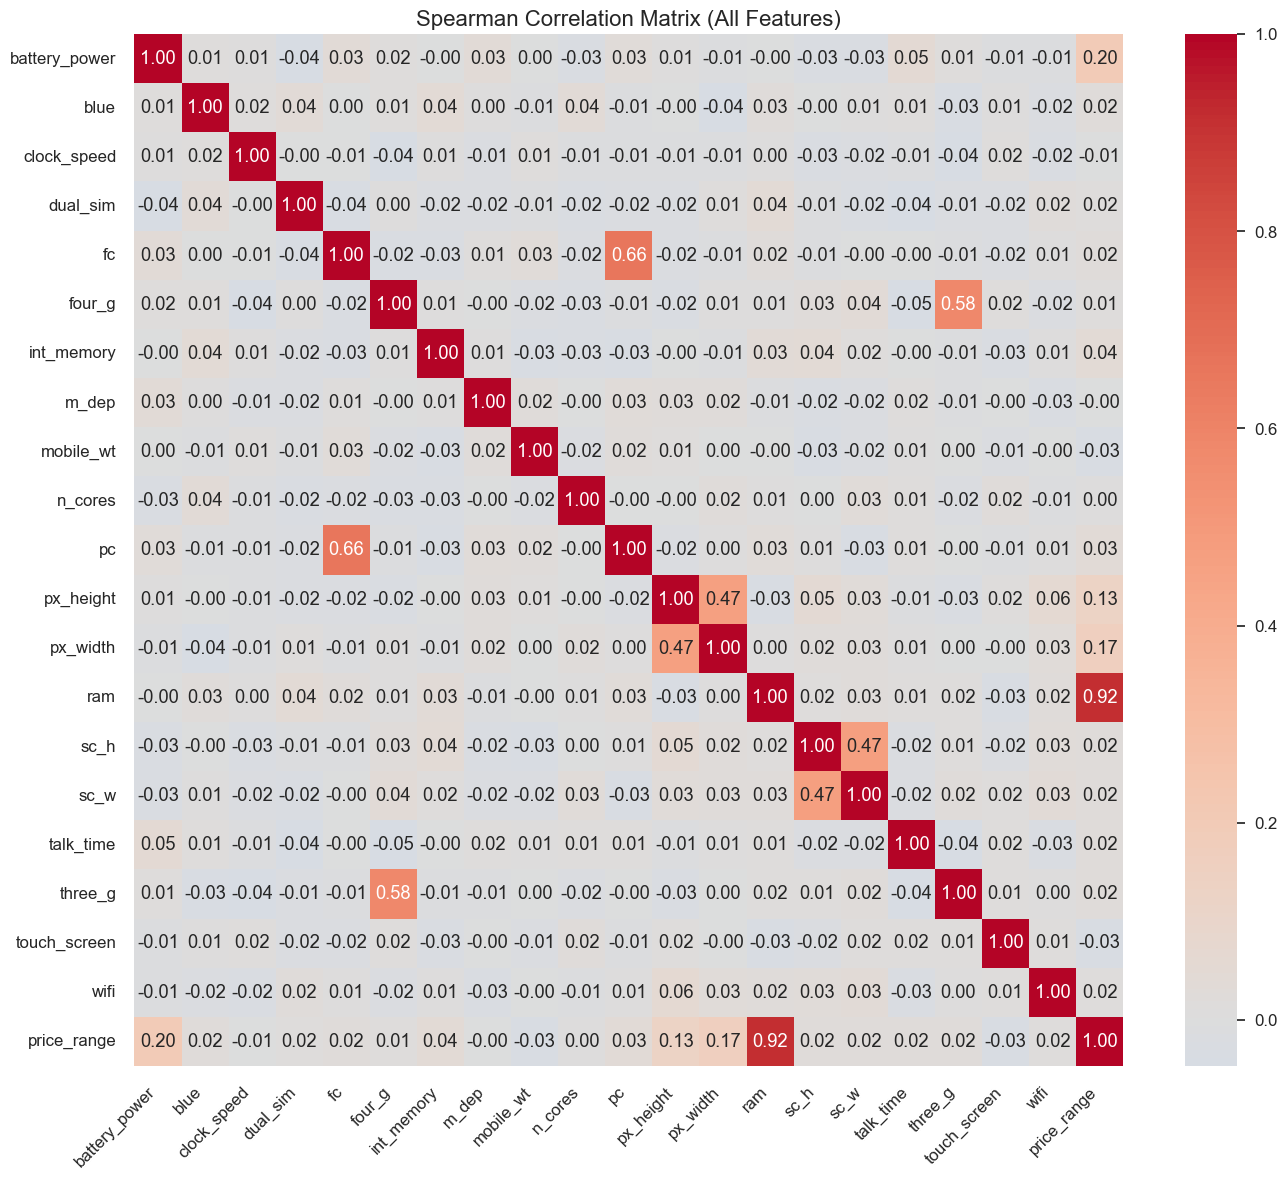

In [33]:
# Compute the full Spearman correlation matrix for the dataset
corr_matrix = df.corr(method='spearman')

# Set up the plot size
plt.figure(figsize=(14, 12))

# Create the heatmap with annotations
sns.heatmap(
    corr_matrix,          # correlation matrix
    annot=True,           # show correlation coefficients
    fmt=".2f",            # format decimals to 2 digits
    cmap='coolwarm',      # color scheme
    center=0              # center the color scale at 0
)

# Add a title to the heatmap
plt.title("Spearman Correlation Matrix (All Features)", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Display the heatmap
plt.show()


| Correlation with `price_range`        | Keep?  | Why?                                                                               |
| ------------------------------------- | ------ | ---------------------------------------------------------------------------------- |
| `ram` → 0.92                          | ✅      | Very predictive — strong positive correlation with price category.                 |
| `battery_power` → 0.20                | ✅      | Useful — battery life often influences mobile pricing.                             |
| `px_width`, `px_height` → \~0.13–0.17 | ✅ / ⚠️ | Mild correlation — may be combined into a single feature like `screen_resolution`. |


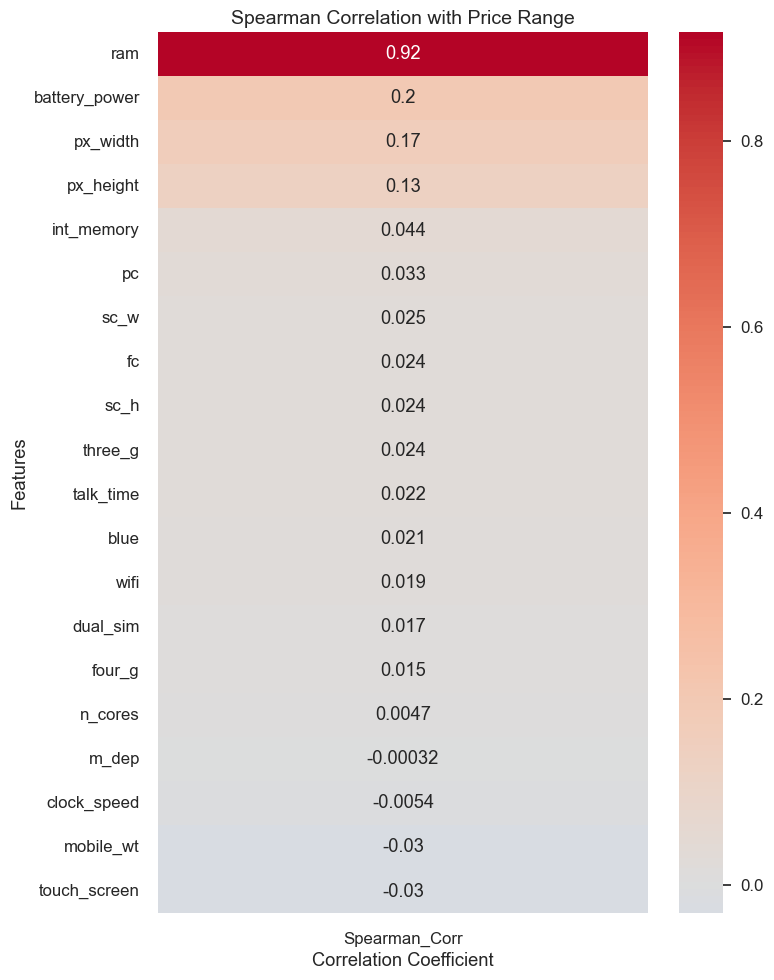

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract Spearman correlation
corr_data = summary_df[['Feature', 'Spearman_Corr']].set_index('Feature')
# Create heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(corr_data.sort_values('Spearman_Corr', ascending=False), annot=True, cmap='coolwarm', center=0)
plt.title("Spearman Correlation with Price Range", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


## 🔍 Spearman Correlation with Price Range

The heatmap above illustrates the Spearman correlation coefficients between each feature and the target variable `price_range`.

- The **strongest correlation** is observed with **`ram` (0.92)**, indicating that devices with more RAM tend to fall into higher price categories.
- **`battery_power` (0.20)**, **`px_width` (0.17)**, and **`px_height` (0.13)** show mild positive correlations, suggesting they may play a secondary role in price differentiation.
- Most of the remaining features, such as `clock_speed`, `touch_screen`, and `mobile_wt`, show **very weak or near-zero correlations**, meaning they likely have little predictive value for the target.
- Negative correlations (e.g., `touch_screen`, `mobile_wt`) are also negligible and can be considered statistically irrelevant.

This analysis helps in selecting the most relevant features for model training and understanding which variables contribute most to the price classification.

In [35]:
anova_results = []

for col in df.columns:
    if col != 'price_range':
        groups = [df[df['price_range'] == val][col] for val in df['price_range'].unique()]
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results.append({
            'Feature': col,
            'F_statistic': f_stat,
            'p_value': p_value,
            'Significant': p_value < 0.05
        })

anova_df = pd.DataFrame(anova_results)

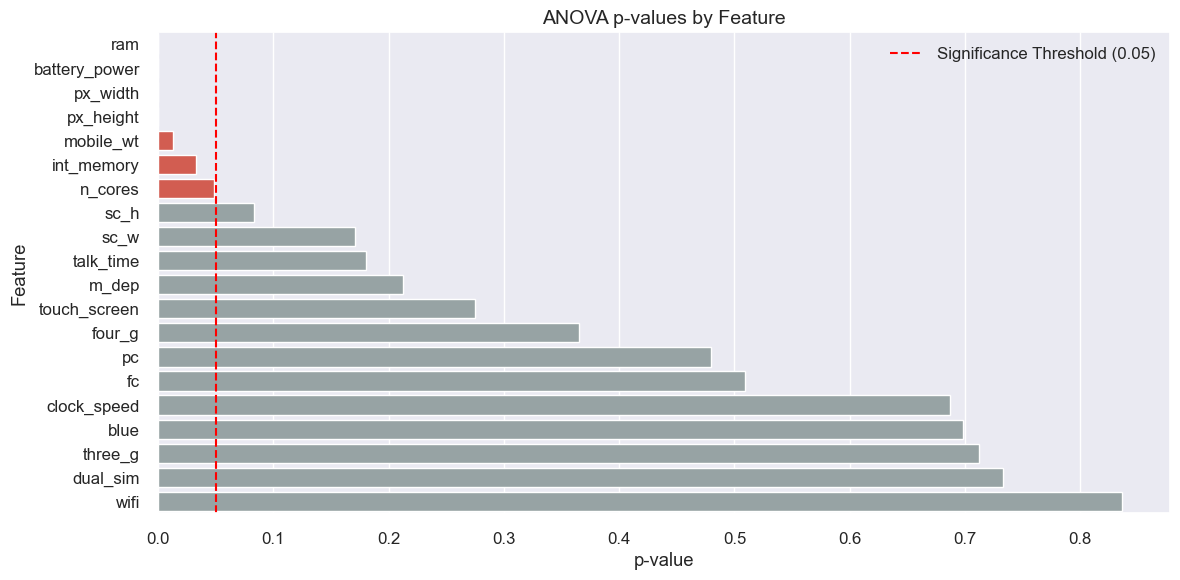

In [36]:
# Add a column for significance to use as hue
anova_df['Significant'] = anova_df['p_value'] < 0.05

# Sort by p-value
sorted_df = anova_df.sort_values('p_value')

# Plot with hue-based coloring
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sorted_df,
    x='p_value',
    y='Feature',
    hue='Significant',        # red if True, grey if False
    dodge=False,
    palette={True: '#E74C3C', False: '#95A5A6'},
    legend=False              # optional: you can set legend=True if you want to display it
)

# Significance line
plt.axvline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title("ANOVA p-values by Feature", fontsize=14)
plt.xlabel("p-value")
plt.ylabel("Feature")
plt.legend()
plt.tight_layout()
plt.show()

## Hypothesis Testing Between Price Groups (ANOVA)

To test whether the mean values of numerical features differ significantly across the 4 price categories (0, 1, 2, 3), we performed **ANOVA tests** (`scipy.stats.f_oneway`) for each feature.

### Hypothesis for each feature:
- **Null Hypothesis (H₀):** The means of the feature are equal across all price_range groups.
- **Alternative Hypothesis (H₁):** At least one group mean is different.

### Result:
We computed the p-values for each feature. Features with **p < 0.05** are statistically significant and help distinguish between price groups.

### Significant Features (p < 0.05):
| Feature         | p-value   | Interpretation                             |
|----------------|-----------|---------------------------------------------|
| `ram`          | < 0.001   | Strongly differentiates price groups        |
| `battery_power`| < 0.001   | Higher battery is linked to higher prices   |
| `px_width`     | < 0.001   | Screen resolution impacts price             |
| `px_height`    | < 0.001   | Combine with width as screen_resolution     |
| `mobile_wt`    | < 0.001   | Heavier phones may include more components  |
| `int_memory`   | < 0.001   | Strong link with storage and price          |
| `n_cores`      | < 0.05    | More cores → often higher-end devices       |

### Non-significant Features (p > 0.05):
Other features like `wifi`, `dual_sim`, `touch_screen`, etc., did **not show significant differences** in means across price groups.

### Conclusion:
We used ANOVA to test group-wise mean differences. This statistical test confirmed that a subset of features are valuable for predicting price range.

### Advanced Statistical Tests with SciPy

Beyond basic statistics, we leveraged **SciPy's advanced statistical functions** to extract deeper insights:

- ✅ `f_oneway()` for ANOVA: tests mean differences across multiple price groups.
- ✅ `spearmanr()` for monotonic correlation analysis between features and target.
- ➕ Potential further analysis (optional):
  - `ttest_ind()` for pairwise comparisons
  - `chi2_contingency()` for categorical variable associations
  - `normaltest()` to assess normality before applying parametric tests

These tools allow for robust, nuanced feature evaluation before modeling.

#### 4. Data Visualization with Matplotlib

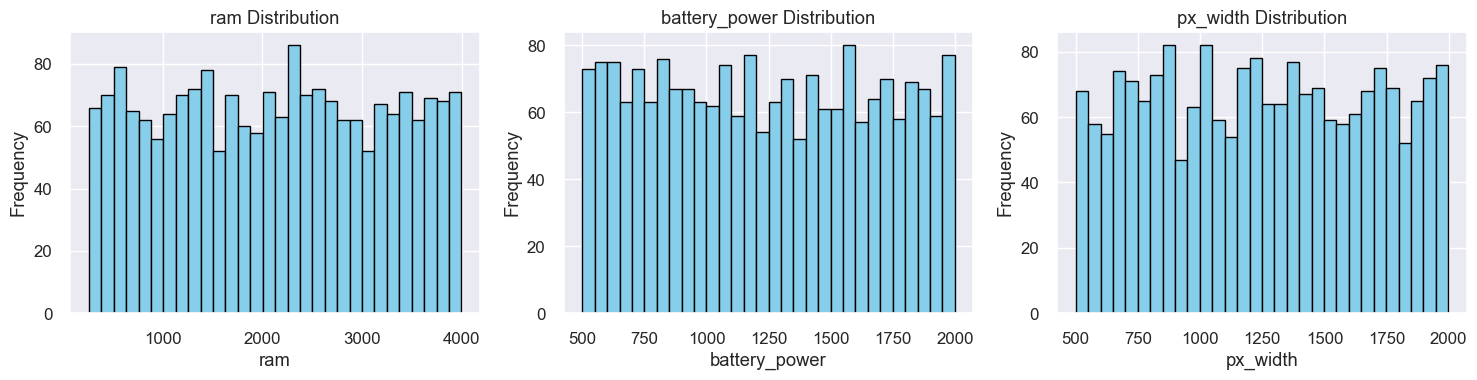

In [37]:
import matplotlib.pyplot as plt

# Features to plot
features = ['ram', 'battery_power', 'px_width']

# Plot histograms
plt.figure(figsize=(15, 4))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Histogram Interpretations and Conclusions
1. RAM Distribution
What it shows: This histogram displays how the RAM values are distributed among all mobile phones in the dataset.

Observation: The bars are relatively evenly spread, suggesting that RAM is uniformly distributed — no single RAM value dominates.

Conclusion: This indicates a balanced dataset in terms of RAM sizes, which is ideal for training a machine learning model. Also, since RAM has a strong correlation with price_range, it's a very useful feature.

2. Battery Power Distribution
What it shows: Frequency distribution of battery_power across all devices.

Observation: The distribution is relatively flat, similar to RAM, suggesting a fairly uniform spread of battery capacities.

Conclusion: There's no major skew or imbalance here, and since battery power has a moderate correlation with price, it’s a relevant variable for prediction.

3. Pixel Width (px_width) Distribution
What it shows: How screen width (in pixels) varies across devices.

Observation: Again, this looks like a roughly uniform distribution, meaning all screen widths are fairly represented.

Conclusion: While not as strongly correlated as RAM, this feature might still contribute meaningful information — possibly in combination with px_height to create a screen resolution feature.

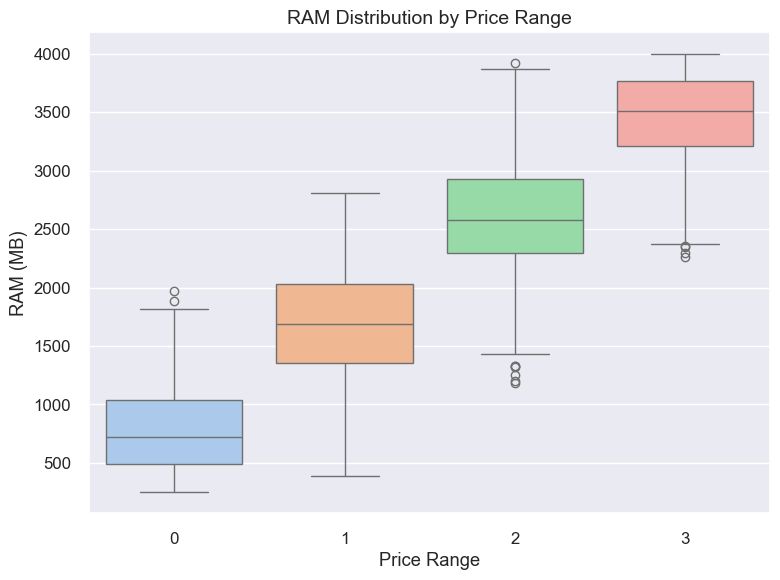

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='price_range', y='ram', hue='price_range', palette='pastel', dodge=False)

# Remove the redundant legend
plt.legend([], [], frameon=False)

# Add labels and title
plt.title("RAM Distribution by Price Range", fontsize=14)
plt.xlabel("Price Range")
plt.ylabel("RAM (MB)")
plt.tight_layout()
plt.show()


This boxplot shows how RAM (in MB) is distributed across the four price_range categories:

| Price Range | Meaning                  |
| ----------- | ------------------------ |
| 0           | Low price phones         |
| 1           | Medium-low price phones  |
| 2           | Medium-high price phones |
| 3           | High price phones        |

What we observe:
Strong Positive Trend 📈
The median RAM increases clearly and significantly from price range 0 to 3:

🟦 Range 0: median ~750 MB

🟧 Range 1: median ~1650 MB

🟩 Range 2: median ~2600 MB

🟥 Range 3: median ~3600 MB

Wider spread in mid ranges
Price ranges 1 and 2 have the widest IQR (interquartile range), meaning more variability in RAM for those categories.

Outliers

A few lower outliers in range 2 and upper outliers in range 0.

These are phones that break the general pattern (e.g. a low-price phone with high RAM).

✅ Conclusion:
🔥 RAM is a strong predictor of price range.

The boxplot confirms the very high correlation seen earlier (ρ = 0.92).

It validates the idea that more expensive phones tend to have more RAM, and vice versa.


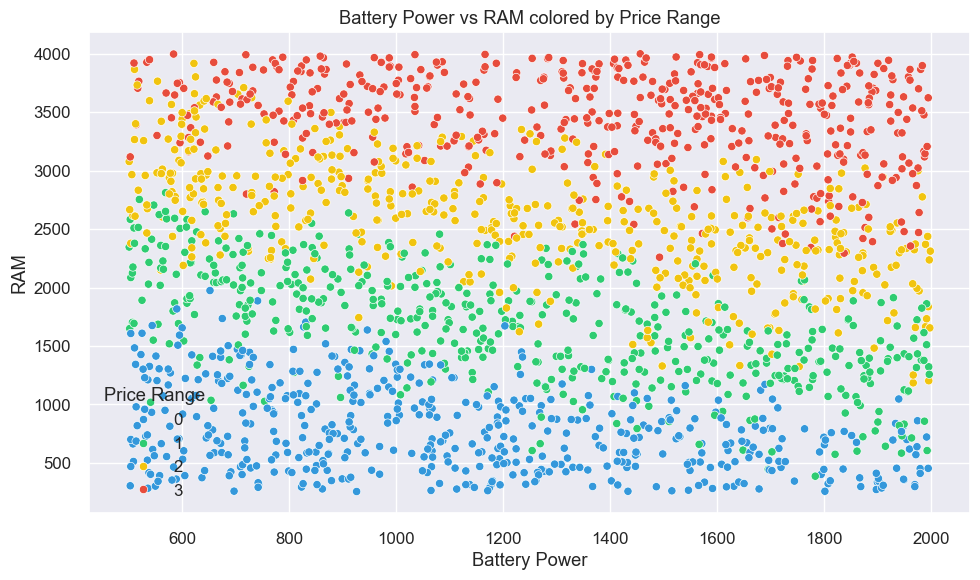

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette for the price ranges
custom_palette = ['#3498db', '#2ecc71', '#f1c40f', '#e74c3c']  # blue, green, yellow, red

plt.figure(figsize=(10, 6))

# Plot scatter with custom colors
sns.scatterplot(
    data=df,
    x='battery_power',
    y='ram',
    hue='price_range',
    palette=custom_palette
)

plt.title("Battery Power vs RAM colored by Price Range")
plt.xlabel("Battery Power")
plt.ylabel("RAM")
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()


Plot Title: Battery Power vs RAM colored by Price Range
🔍 Interpretation:
Clear RAM Separation Across Price Ranges

The data shows distinct horizontal bands by color.

Each price_range is strongly associated with a specific RAM interval.

🟥 Red points (price range 3) are mostly above 3000 MB of RAM.

🟨 Yellow (price range 2) are around 2000–3000 MB.

🟩 Green (price range 1) around 1000–2000 MB.

🔵 Blue (price range 0) below 1000 MB.

Battery Power is Less Discriminative

battery_power appears to be more evenly distributed across all price ranges.

It does not form clear vertical separations like RAM does horizontally.

RAM is a Dominant Feature

The horizontal color blocks confirm that RAM alone is highly predictive of price_range.

This is consistent with the high Spearman correlation (ρ = 0.92).

✅ Conclusion:
📌 RAM is the strongest factor in determining phone price range.

🔋 Battery power has a mild influence, but is not as discriminative on its own.

This visualization supports feature selection: RAM should be prioritized for predictive modeling.

#### 5. Insight Synthesis and Conclusion

Key Findings from Analysis:
RAM is the Primary Determinant of Price Range

Strong Spearman correlation (ρ = 0.92) with price_range.

Clear separation in box plots and scatter plots.

Statistically significant in ANOVA test (p-value < 0.001).

Battery Power Has Moderate Influence

Correlation ≈ 0.20, with slightly increasing trend across price ranges.

ANOVA confirms significance (p < 0.05), but less predictive than RAM.

Pixel Dimensions (px_width, px_height)

Moderate correlation (ρ ≈ 0.13–0.17).

Could be combined as screen_resolution to increase modeling relevance.

Also significant in ANOVA (p < 0.05).

📊 Insights from Visualizations:
RAM clearly separates all price categories, visually and statistically.

Battery power and screen resolution help refine predictions, but less strongly.

Many other features like wifi, bluetooth, four_g, etc. show very low correlation and non-significant p-values, meaning they may not improve the model much.

⚠️ Unexpected or Noteworthy Findings:
Features often assumed to influence price (like wifi, dual_sim, or four_g)
showed low or no statistical significance.

ram alone can almost linearly separate price categories — which is quite rare in real-world datasets.

✅ Final Conclusion:
RAM is the most decisive feature in classifying mobile price range, followed by battery power and screen resolution. Many other features are either redundant or statistically insignificant. These insights should guide feature selection in the modeling phase.